# Data Structures

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import shap
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from category_encoders import JamesSteinEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve
from lime.lime_tabular import LimeTabularExplainer
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

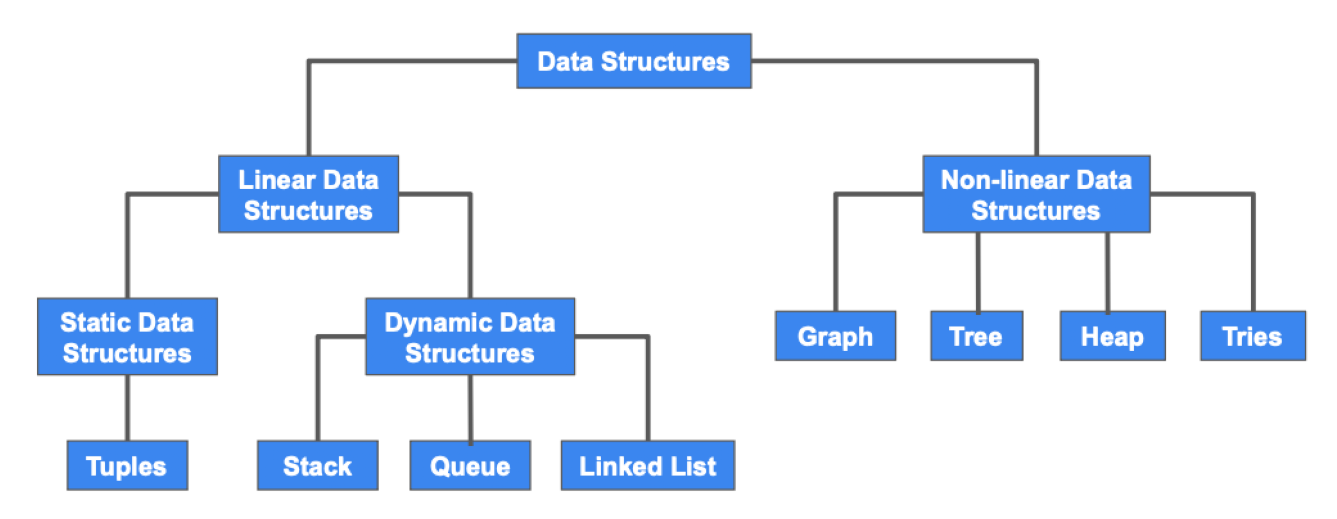

In [4]:
display_img('Data_Structures.png', 17, 17)

All the contents associated to **"Linear Data Structures"** are in the folder: Data_Science_Contents > General_Topics > 04.Lists_Tuples_Sets_Dict_Stacks_Queues.

On this notebook we going to board the contents associated to **"Non-linear Data Structures"**.

In [5]:
start = time.time()

# 1. Graph

A Graph is a non-linear data structure consisting of vertices and edges. The vertices are sometimes also referred to as nodes and the edges are lines or arcs that connect any two nodes in the graph. More formally a Graph is composed of a set of vertices (V) and a set of edges (E). The graph is denoted by G(E,V).

The graphs can be **directed or undirected.**

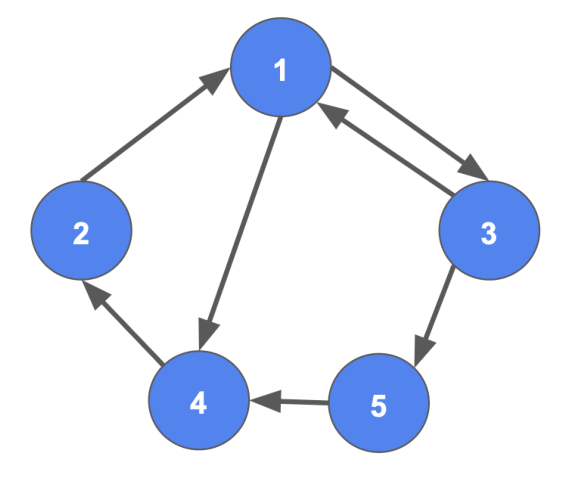

In [6]:
display_img('1.png', 7, 7)

### a. Adjacency matrix

Adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. If the graph is undirected (i.e. all of its edges are bidirectional), the adjacency matrix is symmetric.

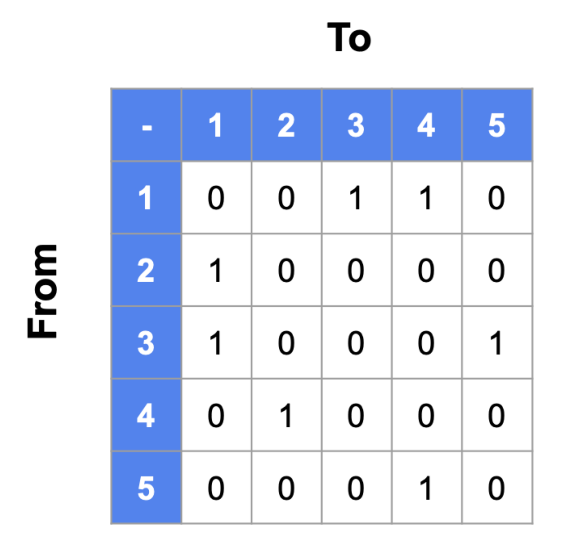

In [7]:
display_img('2.png', 7, 7)

### b. Implementation by Class

In [8]:
class Node:

    def __init__(self, name):

        self.name = name

        self.entering_nodes = []
        self.exiting_nodes = []
        
class Graph:

    def __init__(self):

        self.nodes = {}

    def add_node(self, node):

        self.nodes[node.name] = node

    def add_vertex(self, node_from, node_to):

        self.nodes[node_from.name].exiting_nodes.append(self.nodes[node_to.name])
        self.nodes[node_to.name].entering_nodes.append(self.nodes[node_from.name])


In [9]:
node_1 = Node('1')
node_2 = Node('2')
node_3 = Node('3')
node_4 = Node('4')
node_5 = Node('5')

In [10]:
graph = Graph()

In [11]:
graph.add_node(node_1)
graph.add_node(node_2)
graph.add_node(node_3)
graph.add_node(node_4)
graph.add_node(node_5)

In [12]:
graph.add_vertex(node_1, node_3)
graph.add_vertex(node_3, node_1)
graph.add_vertex(node_3, node_5)
graph.add_vertex(node_5, node_4)
graph.add_vertex(node_1, node_4)
graph.add_vertex(node_4, node_2)
graph.add_vertex(node_2, node_1)

**i. Check the node 1**

**Entering**

In [13]:
graph.nodes['1'].entering_nodes

[<__main__.Node at 0x7f851cde9dc0>, <__main__.Node at 0x7f851cde9e20>]

In [14]:
graph.nodes['1'].entering_nodes[0].name

'3'

In [15]:
graph.nodes['1'].entering_nodes[1].name

'2'

**Exiting**

In [16]:
graph.nodes['1'].exiting_nodes

[<__main__.Node at 0x7f851cde9dc0>, <__main__.Node at 0x7f851cde9b20>]

In [17]:
graph.nodes['1'].exiting_nodes[0].name

'3'

In [18]:
graph.nodes['1'].exiting_nodes[1].name

'4'

### c. Check is a path can be completed in the graph

In [19]:
class Node:


    def __init__(self, name):

        self.name = name

        self.entering_nodes = []
        self.exiting_nodes = []
        

class Graph:


    def __init__(self):

        self.nodes = {}


    def add_node(self, node):

        self.nodes[node.name] = node


    def add_vertex(self, node_from, node_to):

        self.nodes[node_from.name].exiting_nodes.append(self.nodes[node_to.name])
        self.nodes[node_to.name].entering_nodes.append(self.nodes[node_from.name])


    def check_arc_from_to(self, name_node_from, name_node_to):
        
        node_to = self.nodes[name_node_to]

        if node_to in self.nodes[name_node_from].exiting_nodes:

            return True

        else:

            return False
    

    def check_path(self, list_path):

        for i in range(len(list_path) - 1):

            arc_path = list_path[i: i+2]

            name_node_a = arc_path[0]
            name_node_b = arc_path[1]

            exist_arc = self.check_arc_from_to(name_node_a, name_node_b)
            
            if exist_arc == False:

                return False
        
        return True        

In [20]:
node_1 = Node('1')
node_2 = Node('2')
node_3 = Node('3')
node_4 = Node('4')
node_5 = Node('5')

In [21]:
graph = Graph()

In [22]:
graph.add_node(node_1)
graph.add_node(node_2)
graph.add_node(node_3)
graph.add_node(node_4)
graph.add_node(node_5)

In [23]:
graph.add_vertex(node_1, node_3)
graph.add_vertex(node_3, node_1)
graph.add_vertex(node_3, node_5)
graph.add_vertex(node_5, node_4)
graph.add_vertex(node_1, node_4)
graph.add_vertex(node_4, node_2)
graph.add_vertex(node_2, node_1)

### d. Check:

**Path_1:**

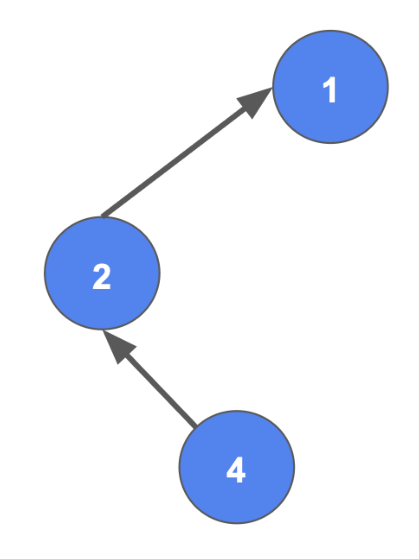

In [24]:
display_img('path_1.png', 7, 7)

In [25]:
path_1 = ['4', '2', '1']

In [26]:
graph.check_path(path_1)

True

**Path_2:**

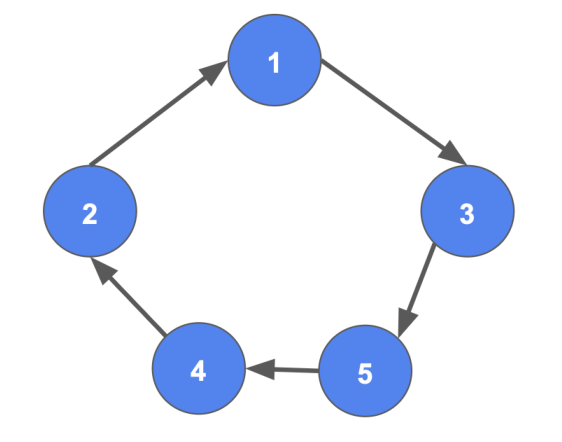

In [27]:
display_img('path_2.png', 7, 7)

In [28]:
path_2 = ['1', '3', '5', '4', '2']


In [29]:
graph.check_path(path_2)

True

**Path_3:**

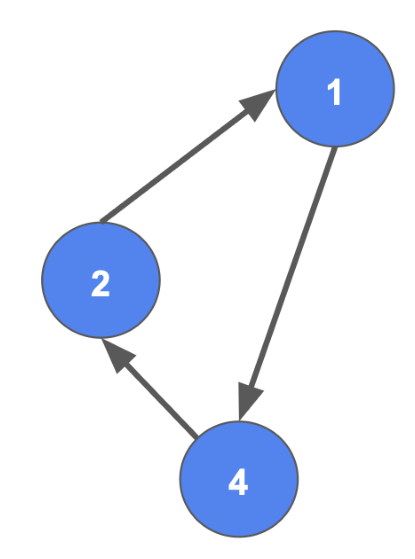

In [30]:
display_img('path_3.png', 7, 7)

In [31]:
path_3 = ['4', '2', '1', '4', '2', '1']

In [32]:
graph.check_path(path_3)

True

**Path_4:**

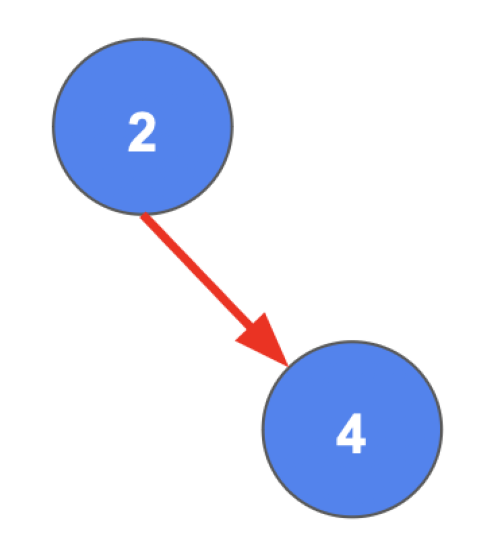

In [33]:
display_img('path_4.png', 7, 7)

In [34]:
path_4 = ['2', '4']

In [35]:
graph.check_path(path_4)

False

# 2. Trees

Tree represents the nodes connected by edges. It is a non-linear data structure. It has the following properties:

* One node is marked as Root node.
* Every node other than the root is associated with one parent node.
* Each node can have an arbiatry number of chid node.

### Binary Tree

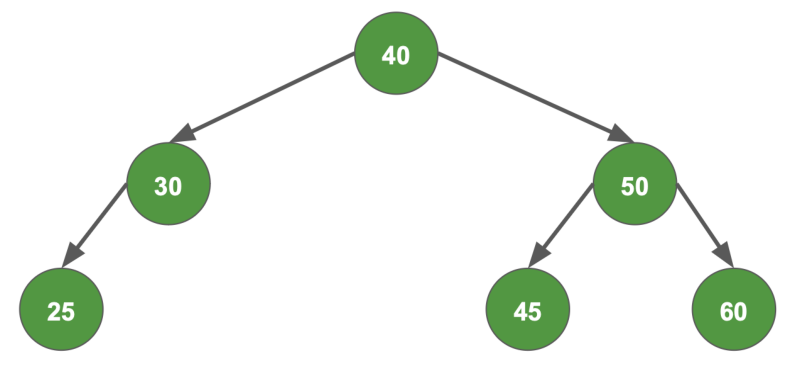

In [36]:
display_img('tree_1.png', 10, 10)

Consider a Tree like this. To insert a value for example you have to following the next steps:

$ \ $

You want to insert the value 47.

$ \ $

i. Compare $ 47 $ with the root node ($40$). You can see $ 47 > 40 $. For this you have to choose the right path.

ii. Now you have to compare $ 47 $ with $ 50 $. You can see $ 47 < 50 $. For this you have to choose the left path.

iii. Now you have to compare $ 47 $ with $ 45 $. You can see $ 47 > 45 $. For this you have to choose the right path.

### a. Implementation by class

In [37]:
class Node:

    def __init__(self, data):

        self.data = data

        self.left_children = None
        self.right_children = None


class Tree:


    def __init__(self, data_root):

        self.root_node = Node(data_root)
    

    def insert_node(self, new_node, review_node):

        if new_node.data < review_node.data:

            if review_node.left_children == None:

                review_node.left_children = new_node
            
            else:

                return self.insert_node(new_node, review_node.left_children)
        
        else:

            if review_node.right_children == None:

                review_node.right_children = new_node
            
            else:

                return self.insert_node(new_node, review_node.right_children)
    

    def insert(self, new_data):

        new_node = Node(new_data)

        return self.insert_node(new_node, self.root_node)

In [38]:
def print_node(node):
    
    print('Node:', node.data)
    
    if node.left_children == None:

        print('Left Children', 'None')
        
    else:

        print('Left Children', node.left_children.data)


    if node.right_children == None:

        print('Right Children', 'None')
        
    else:

        print('Right Children', node.right_children.data)

**To recreate the initial structure you have to insert the nodes by levels.**

In [39]:
tree = Tree(40)

In [40]:
tree.insert(30)
tree.insert(50)

In [41]:
tree.insert(25)
tree.insert(45)
tree.insert(60)

**Level 1:**

In [42]:
print_node(tree.root_node)

Node: 40
Left Children 30
Right Children 50


**Level 2:**

In [43]:
print_node(tree.root_node.left_children)

Node: 30
Left Children 25
Right Children None


In [44]:
print_node(tree.root_node.right_children)

Node: 50
Left Children 45
Right Children 60


**Level 3:**

In [45]:
print_node(tree.root_node.left_children.left_children)

Node: 25
Left Children None
Right Children None


In [46]:
print_node(tree.root_node.right_children.left_children)

Node: 45
Left Children None
Right Children None


In [47]:
print_node(tree.root_node.right_children.right_children)

Node: 60
Left Children None
Right Children None


### b. Insert values

In [48]:
tree.insert(20)
tree.insert(32)
tree.insert(41)
tree.insert(52)

**Level 1:**

In [49]:
print_node(tree.root_node)

Node: 40
Left Children 30
Right Children 50


**Level 2:**

In [50]:
print_node(tree.root_node.left_children)

Node: 30
Left Children 25
Right Children 32


In [51]:
print_node(tree.root_node.right_children)

Node: 50
Left Children 45
Right Children 60


**Level 3:**

In [52]:
print_node(tree.root_node.left_children.left_children)

Node: 25
Left Children 20
Right Children None


In [53]:
print_node(tree.root_node.left_children.right_children)

Node: 32
Left Children None
Right Children None


In [54]:
print_node(tree.root_node.right_children.left_children)

Node: 45
Left Children 41
Right Children None


In [55]:
print_node(tree.root_node.right_children.right_children)

Node: 60
Left Children 52
Right Children None


**Level 4:**

In [56]:
print_node(tree.root_node.left_children.left_children.left_children)

Node: 20
Left Children None
Right Children None


In [57]:
print_node(tree.root_node.right_children.left_children.left_children)

Node: 41
Left Children None
Right Children None


In [58]:
print_node(tree.root_node.right_children.right_children.left_children)

Node: 52
Left Children None
Right Children None


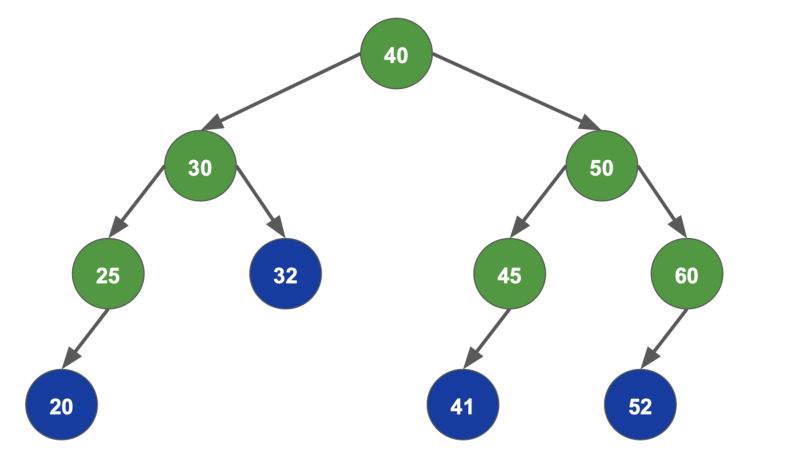

In [59]:
display_img('tree_2.png', 10, 10)

# 3. Heaps

Heap is a special tree structure in which each parent node is less than or equal to its child node. Then it is called a Min Heap. If each parent node is greater than or equal to its child node then it is called a max heap. It is very useful is implementing priority queues where the queue item with higher weightage is given more priority in processing.

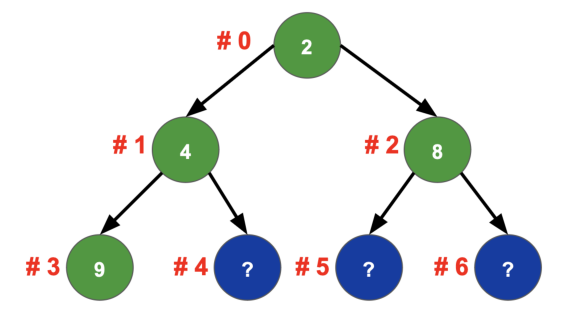

In [60]:
display_img('heap_exp.png', 7, 7)

We can represent a Heap through a **list**.

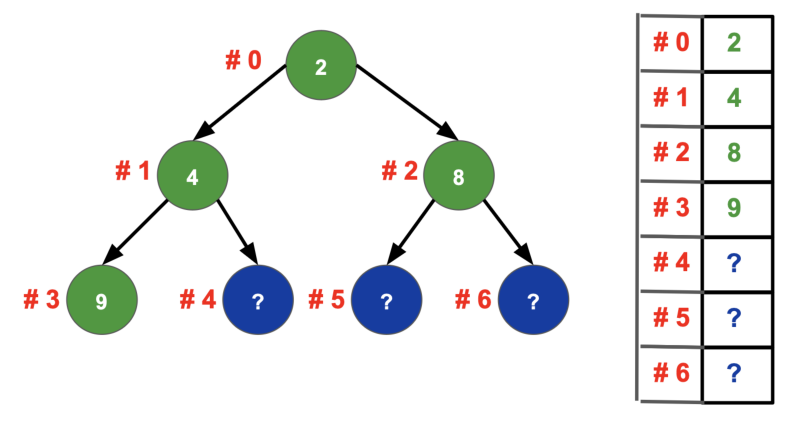

In [61]:
display_img('heap_list.png', 10, 10)

The relation between index are:

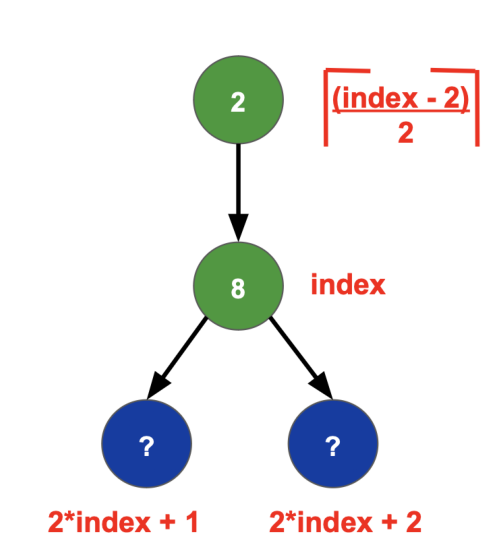

In [62]:
display_img('relation_index.png', 7, 7)

### Steps to insert

**Step 1:** We add the node 3 in the first available place.

**Step 2:** We have to compare this value with the value of its father and then if its is lesser, swap the values.

In [63]:
import math

In [64]:
class Node:

    def __init__(self, index_father_node, index_left_child, index_right_child, value):

        self.index_father_node = index_father_node

        self.index_left_child = index_left_child
        self.index_right_child = index_right_child

        self.value = value
    

class MinHeap:

    def __init__(self):

        self.heap_index = 0

        self.nodes = {}
    

    def add_node(self, value):

        if self.heap_index == 0:

            new_node = Node(None, None, None, value)
        
            self.nodes[self.heap_index] = new_node

            self.heap_index = self.heap_index + 1

        else:

            father_index = math.ceil((self.heap_index - 2)/2)

            is_left = (self.heap_index % 2)

            new_node = Node(father_index, None, None, value)

            self.nodes[self.heap_index] = new_node

            if is_left == 1:

                self.nodes[father_index].index_left_child = self.heap_index
            
            else:
                
                self.nodes[father_index].index_right_child = self.heap_index

            self.heap_index = self.heap_index + 1
    
            
    def print_heap(self):

        for i in range(self.heap_index):

            node = self.nodes[i]

            print('-'*70)

            print('\n')

            print('Node value:', node.value)
            
            print('\n')

            print('Node index:', i)
            
            print('\n')

            if node.index_father_node == None:

                print('Parent node value: None')

            else:
                
                print('Parent node value:', self.nodes[node.index_father_node].value)

            print('\n')

            if node.index_left_child == None:
                
                print('Left child value: None')
            
            else:

                print('Left child value:', self.nodes[node.index_left_child].value)

            if node.index_right_child == None:
                
                print('Right child value: None')
            
            else:

                print('Right child value:', self.nodes[node.index_right_child].value)

            print('\n')

            print('-'*70)

        
    def swap(self, index_up, index_down):
        
        value_up = self.nodes[index_up].value
        value_down = self.nodes[index_down].value

        if self.nodes[index_up].value > self.nodes[index_down].value:

            self.nodes[index_up].value = value_down
            self.nodes[index_down].value = value_up
    

    def swap_total(self, index_now):

        if index_now != 0:
        
            index_down = index_now
            index_up = math.ceil((index_down - 2)/2)

            self.swap(index_up, index_down)
            
            return self.swap_total(index_up)
    

    def swap_def(self):

        self.swap_total(self.heap_index - 1)


    def add_node_def(self, value):

        self.add_node(value)

        if self.heap_index > 1:

            self.swap_def()

### a. Reconstruct the structure

To reconstruct the structure of a defined heap we have to start from above levels to below levels and for every level we have to start from left to right.

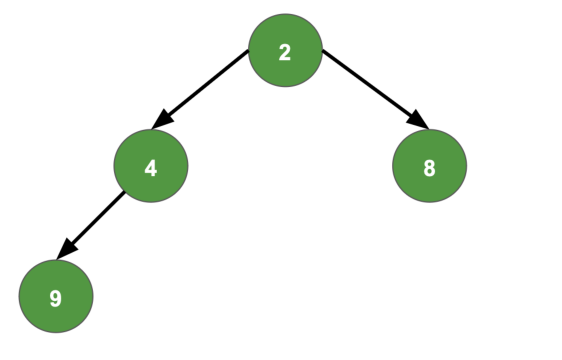

In [65]:
display_img('heap_1.png', 7, 7)

In [66]:
min_heap = MinHeap()

**Level 1:**

In [67]:
min_heap.add_node_def(2)

**Level 2:**

In [68]:
min_heap.add_node_def(4)
min_heap.add_node_def(8)

**Level 3:**

In [69]:
min_heap.add_node_def(9)

**Print:**

In [70]:
min_heap.print_heap()

----------------------------------------------------------------------


Node value: 2


Node index: 0


Parent node value: None


Left child value: 4
Right child value: 8


----------------------------------------------------------------------
----------------------------------------------------------------------


Node value: 4


Node index: 1


Parent node value: 2


Left child value: 9
Right child value: None


----------------------------------------------------------------------
----------------------------------------------------------------------


Node value: 8


Node index: 2


Parent node value: 2


Left child value: None
Right child value: None


----------------------------------------------------------------------
----------------------------------------------------------------------


Node value: 9


Node index: 3


Parent node value: 4


Left child value: None
Right child value: None


----------------------------------------------------------------------


### b. Add element

**Step 1:** We add the node 3 in the first available place.

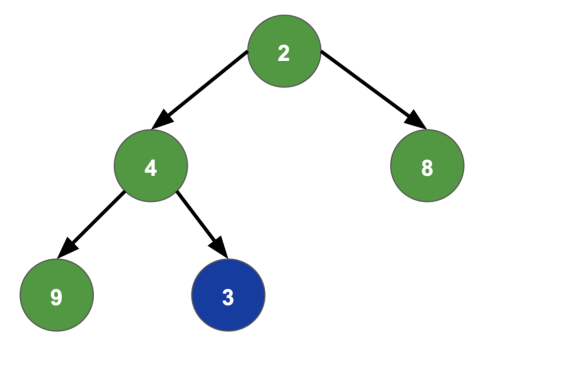

In [71]:
display_img('heap_2.png', 7, 7)

**Step 2:** We have to compare this value with the value of its father and then if its is lesser, swap the values.

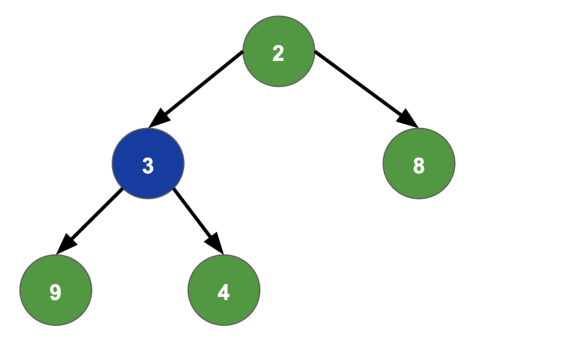

In [72]:
display_img('heap_3.png', 7, 7)

In [73]:
min_heap.add_node_def(3)

In [74]:
min_heap.print_heap()

----------------------------------------------------------------------


Node value: 2


Node index: 0


Parent node value: None


Left child value: 3
Right child value: 8


----------------------------------------------------------------------
----------------------------------------------------------------------


Node value: 3


Node index: 1


Parent node value: 2


Left child value: 9
Right child value: 4


----------------------------------------------------------------------
----------------------------------------------------------------------


Node value: 8


Node index: 2


Parent node value: 2


Left child value: None
Right child value: None


----------------------------------------------------------------------
----------------------------------------------------------------------


Node value: 9


Node index: 3


Parent node value: 3


Left child value: None
Right child value: None


----------------------------------------------------------------------
-----------------

# 4. Tries

Trie is a type of k-ary search tree used for storing and searching a specific key from a set. Using Trie, search complexities can be brought to optimal limit (key length). 

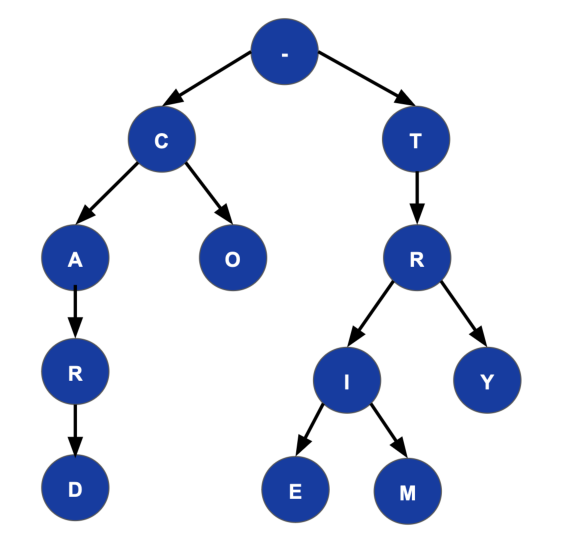

In [75]:
display_img('tries.png', 7, 7)

In [76]:
class Node:

    def __init__(self, data):

        self.data = data

        self.childrens = []
        self.node_childrens = []


class Tries:

    def __init__(self):

        self.root_node = Node('-')

    
    def insert_text(self, text):

        text = '-' + text

        actual_node = self.root_node

        for i in range(len(text) - 1):

            frac_txt = text[i: i + 2]
            b = frac_txt[1]

            if b in actual_node.childrens:
                
                index_b = actual_node.childrens.index(b)

                actual_node = actual_node.node_childrens[index_b]
            
            else:

                actual_node.childrens.append(b)
                actual_node.node_childrens.append(Node(b))

                actual_node = actual_node.node_childrens[-1]

In [77]:
tries = Tries()

In [78]:
tries.insert_text('card')
tries.insert_text('car')
tries.insert_text('co')
tries.insert_text('try')
tries.insert_text('trim')
tries.insert_text('trie')

**Root Node**

In [79]:
print(tries.root_node.data)
print(tries.root_node.childrens)

-
['c', 't']


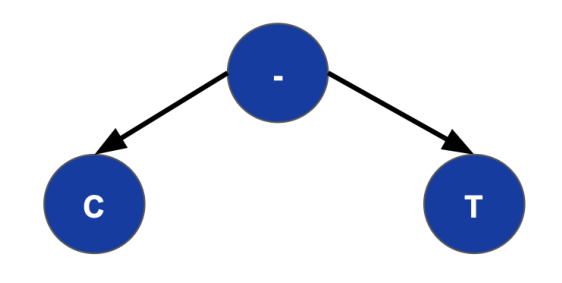

In [80]:
display_img('tries_1.png', 7, 7)

**Root C**

In [81]:
print(tries.root_node.node_childrens[0].data)
print(tries.root_node.node_childrens[0].childrens)

c
['a', 'o']


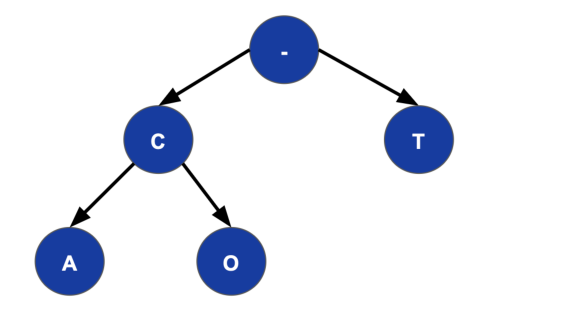

In [82]:
display_img('tries_2.png', 7, 7)

**Root C A**

In [83]:
print(tries.root_node.node_childrens[0].node_childrens[0].data)
print(tries.root_node.node_childrens[0].node_childrens[0].childrens)

a
['r']


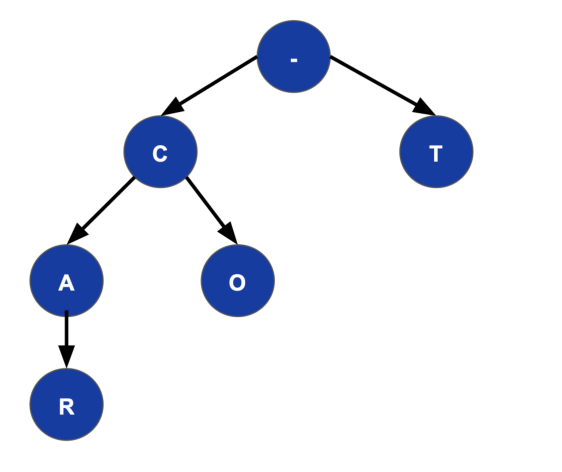

In [84]:
display_img('tries_3.png', 7, 7)

**Root C A R**

In [85]:
print(tries.root_node.node_childrens[0].node_childrens[0].node_childrens[0].data)
print(tries.root_node.node_childrens[0].node_childrens[0].node_childrens[0].childrens)

r
['d']


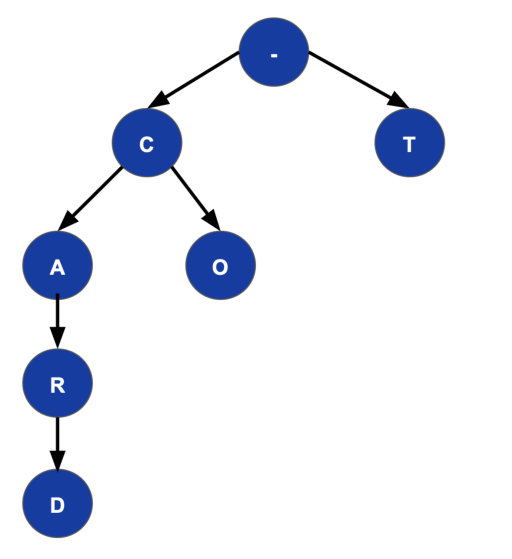

In [86]:
display_img('tries_4.png', 7, 7)

**Root C A R D**

In [87]:
print(tries.root_node.node_childrens[0].node_childrens[0].node_childrens[0].node_childrens[0].data)
print(tries.root_node.node_childrens[0].node_childrens[0].node_childrens[0].node_childrens[0].childrens)

d
[]


**Root C O**

In [88]:
print(tries.root_node.node_childrens[0].node_childrens[1].data)
print(tries.root_node.node_childrens[0].node_childrens[1].childrens)

o
[]


**Root T**

In [89]:
print(tries.root_node.node_childrens[1].data)
print(tries.root_node.node_childrens[1].childrens)

t
['r']


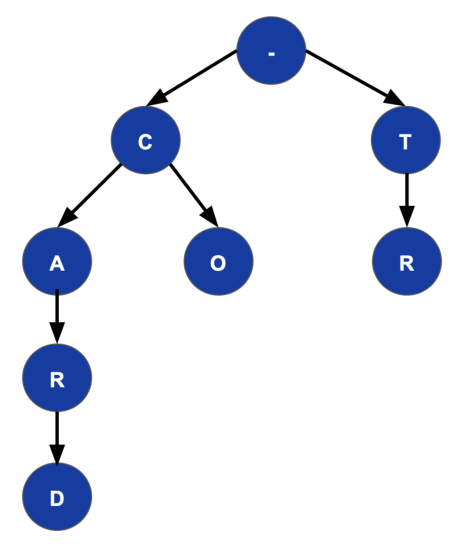

In [90]:
display_img('tries_5.png', 7, 7)

**Root T R**

In [91]:
print(tries.root_node.node_childrens[1].node_childrens[0].data)
print(tries.root_node.node_childrens[1].node_childrens[0].childrens)

r
['y', 'i']


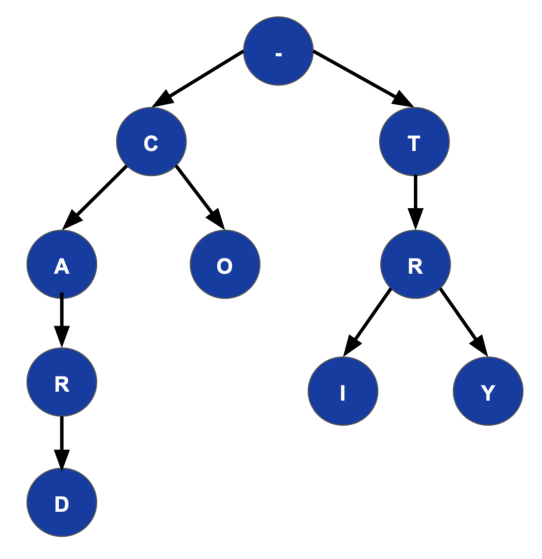

In [92]:
display_img('tries_6.png', 7, 7)

**Root T R Y**

In [93]:
print(tries.root_node.node_childrens[1].node_childrens[0].node_childrens[0].data)
print(tries.root_node.node_childrens[1].node_childrens[0].node_childrens[0].childrens)

y
[]


**Root T R I**

In [94]:
print(tries.root_node.node_childrens[1].node_childrens[0].node_childrens[1].data)
print(tries.root_node.node_childrens[1].node_childrens[0].node_childrens[1].childrens)

i
['m', 'e']


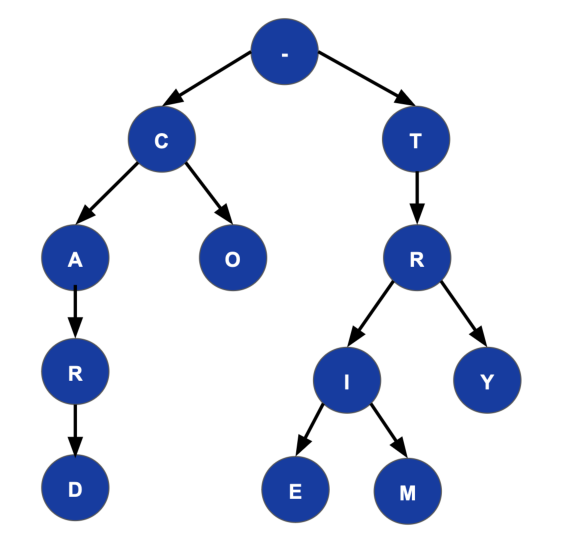

In [95]:
display_img('tries.png', 7, 7)

**Root T R I M**

In [96]:
print(tries.root_node.node_childrens[1].node_childrens[0].node_childrens[1].node_childrens[0].data)
print(tries.root_node.node_childrens[1].node_childrens[0].node_childrens[1].node_childrens[0].childrens)

m
[]


**Root T R I E**

In [97]:
print(tries.root_node.node_childrens[1].node_childrens[0].node_childrens[1].node_childrens[1].data)
print(tries.root_node.node_childrens[1].node_childrens[0].node_childrens[1].node_childrens[1].childrens)

e
[]


### Time of execution

In [98]:
end = time.time()

In [99]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 2 seconds.
